Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 
Name / Data Type / Measurement Unit / Description 

Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV


from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from scipy import stats

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [3]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [4]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


the target column is numerical column and it is a regression problem

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Sex is a nominal column, and other columns(length,diameter, height, whole weight, shucked weight, viscera weight, shell weight) are numerical columns
Rings is the target column and it is integer column

No missing data in any feature

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

## checking for outliers

In [9]:
zScores=np.abs(zscore(df.drop(['Rings','Sex'],axis=1)))
zScores

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.60768536, 0.72621157,
        0.63821689],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.17090984, 1.20522124,
        1.21298732],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.4634999 , 0.35668983,
        0.20713907],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.74855917, 0.97541324,
        0.49695471],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.77334105, 0.73362741,
        0.41073914],
       [1.54905203, 1.48263359, 1.32665906, ..., 2.64099341, 1.78744868,
        1.84048058]])

In [10]:
filteredEntries=(zScores<3).all(axis=1)
filteredEntries

array([ True,  True,  True, ...,  True,  True,  True])

In [11]:
np.sum(filteredEntries)

4084

In [12]:
(4177-4084)/4177 

0.022264783337323436

only 2% data is outliers so removing them

In [13]:
df=df[filteredEntries]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4084 non-null   object 
 1   Length          4084 non-null   float64
 2   Diameter        4084 non-null   float64
 3   Height          4084 non-null   float64
 4   Whole weight    4084 non-null   float64
 5   Shucked weight  4084 non-null   float64
 6   Viscera weight  4084 non-null   float64
 7   Shell weight    4084 non-null   float64
 8   Rings           4084 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 319.1+ KB


## EDA

<AxesSubplot:xlabel='Length', ylabel='Density'>

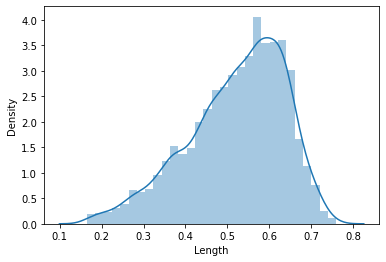

In [15]:
sns.distplot(df['Length'])

Length has some skewness

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

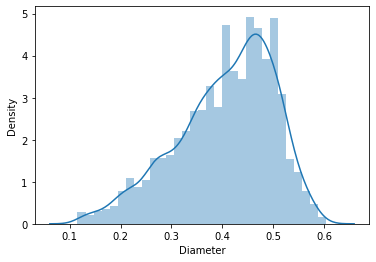

In [16]:
sns.distplot(df['Diameter'])

'Diameter' feature has some skewness

<AxesSubplot:xlabel='Height', ylabel='Density'>

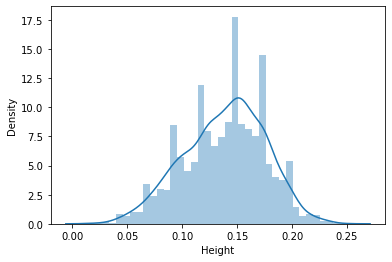

In [17]:
sns.distplot(df['Height'])

Height is almost normally distributed

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

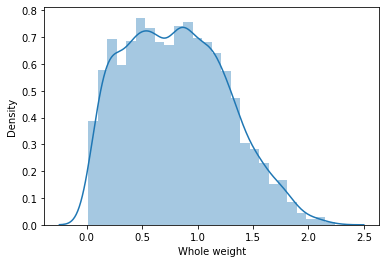

In [18]:
sns.distplot(df['Whole weight'])

Whole weight is skewed

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

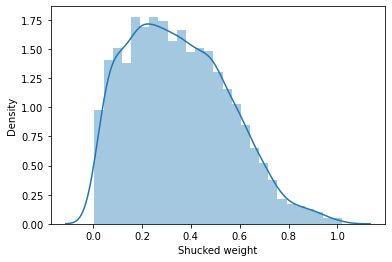

In [19]:
sns.distplot(df['Shucked weight'])

Shucked weight is  skewed

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

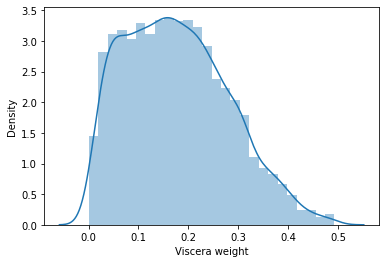

In [20]:
sns.distplot(df['Viscera weight'])

Viscera weight is skewed

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

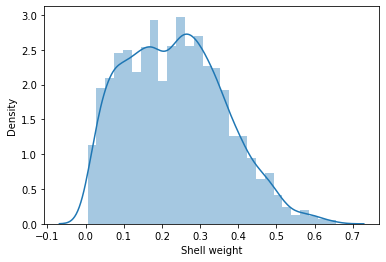

In [21]:
sns.distplot(df['Shell weight'])

Shell weight is skewed

## removing skewness

In [22]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [23]:
for column in df.columns[1:-1]:
    print(column , df[column].skew())

Length -0.6337858407920536
Diameter -0.6054497490522595
Height -0.24719203580354787
Whole weight 0.3238859455043523
Shucked weight 0.4495734590322344
Viscera weight 0.42993249450635435
Shell weight 0.35851169715737413


Only length and diameter are a bit more skewed others have only values between -0.5 and 0.5

In [24]:
def min_skewness(colu):
    min_Skew=np.abs(df[colu].skew())
    print("initial",min_Skew)
    
    box_col_Skew=10
    min_SkewType=""
    log_col=np.log(df[colu])
    sqrt_col=np.sqrt(df[colu])
    try:
        box_col=stats.boxcox(df[colu])[0]
        box_col_Skew=np.abs(pd.Series(box_col).skew())
        print(box_col_Skew)

    except ValueError:
        print("hi")
    
    log_col_Skew=np.abs(log_col.skew())
    sqrt_col_Skew=np.abs(sqrt_col.skew())
    
    print(log_col_Skew)
    print(sqrt_col_Skew)
    
    if log_col_Skew<min_Skew:
        min_SkewType="log"
        min_Skew=log_col_Skew
    if sqrt_col_Skew<min_Skew:
        min_SkewType="sqrt"
        min_Skew=sqrt_col_Skew
    if box_col_Skew<min_Skew:
        min_SkewType="box"
        min_Skew=box_col_Skew
    print(min_Skew)
    print(column,"=",min_SkewType)
        



In [25]:
moreSkew=['Length','Diameter']
for column in moreSkew:
    print(column)
    min_skewness(column)
    print("="*20)

Length
initial 0.6337858407920536
0.14315071614270394
1.335346132176373
0.9507788106472157
0.14315071614270394
Length = box
Diameter
initial 0.6054497490522595
0.14880367081424045
1.3391801682780307
0.9353353052322538
0.14880367081424045
Diameter = box


based on the above output apply the Boxcox transformation as below as they give minimum skew.

In [26]:
df['Length']= stats.boxcox(df['Length'])[0]
df['Diameter']=stats.boxcox(np.sqrt(df['Diameter']))[0]

In [27]:
for column in df.columns[1:-1]:
    print(column , df[column].skew())

Length -0.14315071614270394
Diameter -0.14880365044822408
Height -0.24719203580354787
Whole weight 0.3238859455043523
Shucked weight 0.4495734590322344
Viscera weight 0.42993249450635435
Shell weight 0.35851169715737413


Now all features are having very less skew(between -0.5 and +0.5)

<AxesSubplot:xlabel='Length', ylabel='Rings'>

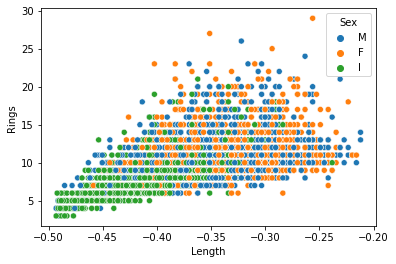

In [28]:
sns.scatterplot(data=df,x='Length',y='Rings',hue='Sex')

As the length is increasing Rings is also increasing
and most of the infants have less length and rings

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

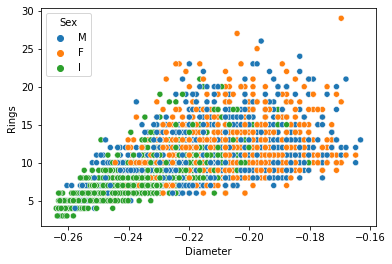

In [29]:
sns.scatterplot(data=df,x='Diameter',y='Rings',hue='Sex')

As the Diameter is increasing Rings is also increasing
and most of the infants have less Diameter and Rings

<AxesSubplot:xlabel='Height', ylabel='Rings'>

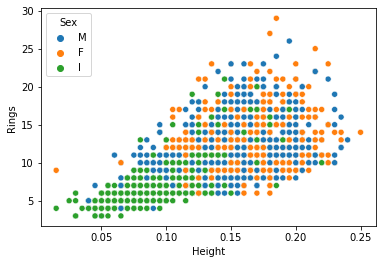

In [30]:
sns.scatterplot(data=df,x='Height',y='Rings',hue='Sex')

As the Height is increasing Rings is also increasing
and most of the infants have less Height and Rings

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

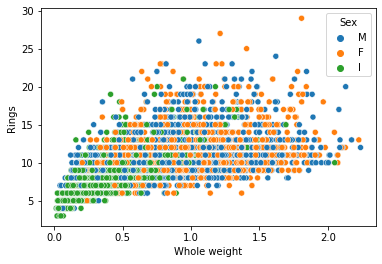

In [31]:
sns.scatterplot(data=df,x='Whole weight',y='Rings',hue='Sex')

As the Whole weight is increasing Rings is also increasing
and most of the infants have less Whole weight and Rings

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

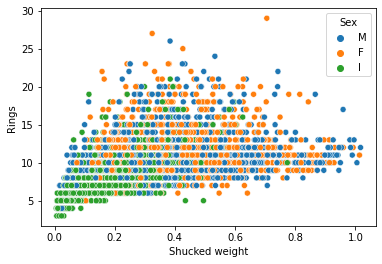

In [32]:
sns.scatterplot(data=df,x='Shucked weight',y='Rings',hue='Sex')


as the Shucked weight increases Rings increase
and most of the infants have less shucked wight anf rings

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

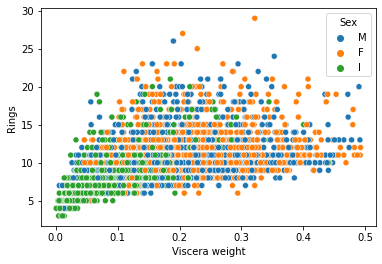

In [33]:
sns.scatterplot(data=df,x='Viscera weight',y='Rings',hue='Sex')


as the Viscera weight increases Rings increases and infants have less Viscera weight and rings

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

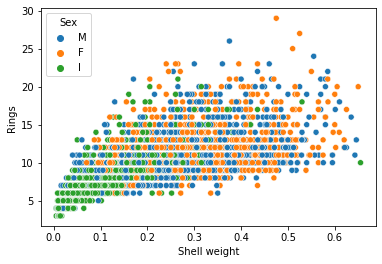

In [34]:
sns.scatterplot(data=df,x='Shell weight',y='Rings',hue='Sex')


as the Shell weight increases Rings increases and infants have less Shell weight and rings

encoding the categorical columns(Sex)

In [35]:
df=pd.get_dummies(df,drop_first=True)

In [36]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,-0.400009,-0.227553,0.095,0.5140,0.2245,0.1010,0.1500,15,0,1
1,-0.443436,-0.246052,0.090,0.2255,0.0995,0.0485,0.0700,7,0,1
2,-0.362280,-0.215254,0.135,0.6770,0.2565,0.1415,0.2100,9,0,0
3,-0.406885,-0.227553,0.125,0.5160,0.2155,0.1140,0.1550,10,0,1
4,-0.450459,-0.247621,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,-0.342769,-0.207924,0.165,0.8870,0.3700,0.2390,0.2490,11,0,0
4173,-0.328092,-0.210416,0.135,0.9660,0.4390,0.2145,0.2605,10,0,1
4174,-0.322049,-0.201486,0.205,1.1760,0.5255,0.2875,0.3080,9,0,1
4175,-0.306509,-0.198826,0.150,1.0945,0.5310,0.2610,0.2960,10,0,0


In [37]:
y=df['Rings']
X=df.drop('Rings',axis=1)

## identifying the best random state

In [38]:
minRMSE="null"
minRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    if(minRMSE=="null" or RMSE<minRMSE):
        minRMSE=RMSE
        minRS=i
        
print("min RMSE is",minRMSE,"on random state",minRS)

min RMSE is 2.035990168068692 on random state 165


min RMSE is 2.035990168068692 on random state 165

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=165)


## Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [81]:
help(ColumnTransformer)

Help on class ColumnTransformer in module sklearn.compose._column_transformer:

class ColumnTransformer(sklearn.base.TransformerMixin, sklearn.utils.metaestimators._BaseComposition)
 |  ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False)
 |  
 |  Applies transformers to columns of an array or pandas DataFrame.
 |  
 |  This estimator allows different columns or column subsets of the input
 |  to be transformed separately and the features generated by each transformer
 |  will be concatenated to form a single feature space.
 |  This is useful for heterogeneous or columnar data, to combine several
 |  feature extraction mechanisms or transformations into a single transformer.
 |  
 |  Read more in the :ref:`User Guide <column_transformer>`.
 |  
 |  .. versionadded:: 0.20
 |  
 |  Parameters
 |  ----------
 |  transformers : list of tuples
 |      List of (name, transformer, columns) tuples specifying the
 |    

In [42]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')

In [43]:

ct = ColumnTransformer([('somename', StandardScaler(), ['Length', 'Diameter','Height','Whole weight','Shucked weight',
                                                       'Viscera weight','Shell weight'])], remainder='passthrough')

x_train_scale=ct.fit_transform(X_train)


In [44]:
X_train.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Sex_I', 'Sex_M'],
      dtype='object')

In [45]:
XtrainDF=pd.DataFrame(x_train_scale,columns=X_train.columns)
XtrainDF

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_I,Sex_M
0,0.060840,0.053703,0.043521,0.000092,0.100934,-0.029630,-0.174310,0.0,0.0
1,-0.080913,-0.116207,0.589101,-0.322496,-0.405078,-0.615405,-0.058404,0.0,0.0
2,2.063027,2.115537,2.089445,2.841935,2.484322,2.996877,2.854707,0.0,0.0
3,0.206465,0.111520,-0.229269,-0.084395,-0.412411,-0.073563,0.327951,0.0,1.0
4,-1.509447,-1.517082,-1.729614,-1.371454,-1.338877,-1.323217,-1.391326,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2731,1.048395,1.115946,0.452706,1.063314,1.200959,1.351824,0.868847,0.0,0.0
2732,0.561296,0.595145,0.725496,0.680379,0.822061,0.951544,0.327951,0.0,1.0
2733,0.719805,0.532650,0.861890,0.695740,-0.006624,1.259076,0.637034,0.0,0.0
2734,0.666540,0.409405,0.043521,0.140538,-0.028625,0.190036,0.451584,0.0,0.0


In [46]:
x_test_scale=ct.transform(X_test)
x_test_scale

array([[-0.03409268, -0.0601611 ,  0.45270561, ..., -0.14340152,
         0.        ,  1.        ],
       [ 1.33399402,  1.67349457,  1.27107533, ...,  1.71882577,
         0.        ,  1.        ],
       [-1.87002786, -1.92041284, -2.00240352, ..., -1.58063919,
         1.        ,  0.        ],
       ...,
       [-0.12730349, -0.0601611 ,  0.04352076, ..., -0.29407966,
         1.        ,  0.        ],
       [ 0.50931779,  0.59514523,  0.72549552, ...,  0.32022353,
         0.        ,  1.        ],
       [ 1.27601853,  1.11594572,  0.99828542, ...,  0.72203191,
         0.        ,  0.        ]])

In [47]:
XtestDF=pd.DataFrame(x_test_scale,columns=X_train.columns)
XtestDF

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_I,Sex_M
0,-0.034093,-0.060161,0.452706,-0.196314,-0.331743,-0.068681,-0.143402,0.0,1.0
1,1.333994,1.673495,1.271075,1.130246,0.890507,0.858796,1.718826,0.0,1.0
2,-1.870028,-1.920413,-2.002404,-1.533845,-1.439101,-1.518475,-1.580639,1.0,0.0
3,1.813184,2.115537,1.680260,2.044244,2.088313,2.157265,1.765188,0.0,0.0
4,0.108952,0.348657,0.316311,-0.010881,0.025154,-0.122377,-0.197491,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1343,-1.181887,-1.067328,-1.456824,-1.011560,-0.818198,-1.035211,-1.186558,1.0,0.0
1344,-1.250880,-1.154691,-1.320429,-1.158590,-0.893978,-1.103551,-1.163377,1.0,0.0
1345,-0.127303,-0.060161,0.043521,-0.232522,-0.043292,-0.454317,-0.294080,1.0,0.0
1346,0.509318,0.595145,0.725496,0.175650,0.264715,-0.127259,0.320224,0.0,1.0


In [48]:
lr=LinearRegression()
lr.fit(XtrainDF,y_train)
pred=lr.predict(XtestDF)

lrR2=r2_score(y_test, pred)
lrR2

0.5473896599440181

In [49]:
lrRMSE=np.sqrt(mean_squared_error(y_test,pred))
lrRMSE

2.035990168068691

In [50]:
svr=SVR()
svr.fit(XtrainDF,y_train)
pred=svr.predict(XtestDF)
svrR2=r2_score(y_test, pred)
svrR2

0.5650555216813503

In [51]:
svrRMSE=np.sqrt(mean_squared_error(y_test,pred))
svrRMSE

1.9958612743782356

In [52]:
sgd=SGDRegressor()
sgd.fit(XtrainDF,y_train)
pred=sgd.predict(XtestDF)
sgdR2=r2_score(y_test, pred)
sgdR2

0.5386179829001052

In [53]:
sgdRMSE=np.sqrt(mean_squared_error(y_test,pred))
sgdRMSE

2.0556244396783274

In [54]:
knnR=KNeighborsRegressor()
knnR.fit(XtrainDF,y_train)
pred=knnR.predict(XtestDF)
knnR2=r2_score(y_test, pred)
knnR2

0.5133183688253679

In [55]:
knnrRMSE=np.sqrt(mean_squared_error(y_test,pred))
knnrRMSE

2.1112317976158126

## frinding cross val score for each model

In [56]:

ct = ColumnTransformer([('somename', StandardScaler(), ['Length', 'Diameter','Height','Whole weight','Shucked weight',
                                                       'Viscera weight','Shell weight'])], remainder='passthrough')

X_scale=ct.fit_transform(X)


In [57]:
XScaleDF=pd.DataFrame(X_scale,columns=X_train.columns)
XScaleDF

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_I,Sex_M
0,-0.692612,-0.545411,-1.176592,-0.643836,-0.610645,-0.731485,-0.642187,0.0,1.0
1,-1.442343,-1.433608,-1.311741,-1.274762,-1.218024,-1.239599,-1.260107,0.0,1.0
2,-0.041261,0.045106,-0.095405,-0.287369,-0.455155,-0.339512,-0.178747,0.0,0.0
3,-0.811323,-0.545411,-0.365702,-0.639463,-0.654376,-0.605666,-0.603567,0.0,1.0
4,-1.563595,-1.508949,-1.582038,-1.319594,-1.266615,-1.326704,-1.375967,1.0,0.0
...,...,...,...,...,...,...,...,...,...
4079,0.295586,0.397019,0.715486,0.171884,0.096346,0.604128,0.122489,0.0,0.0
4080,0.548970,0.277396,-0.095405,0.344651,0.431619,0.367009,0.211315,0.0,1.0
4081,0.653301,0.706164,1.796673,0.803903,0.851926,1.073529,0.578205,0.0,1.0
4082,0.921569,0.833838,0.310041,0.625670,0.878651,0.817052,0.485517,0.0,0.0


In [58]:
lrCV=cross_val_score(lr,XScaleDF,y,cv=5,scoring='r2').mean()
lrCV

0.4108397852165142

In [59]:
svrCV=cross_val_score(svr,XScaleDF,y,cv=5,scoring='r2').mean()
svrCV

0.48689248842997834

In [60]:
sgdCV=cross_val_score(sgd,XScaleDF,y,cv=5,scoring='r2').mean()
sgdCV

0.4094711068242445

In [61]:
knnrCV=cross_val_score(knnR,XScaleDF,y,cv=5,scoring='r2').mean()
knnrCV

0.3722515752400685

In [62]:
def rmseValue(model,indepen,depend):
    y_pred=model.predict(indepen)
    return np.sqrt(mean_squared_error(y_pred,depend))

lrCV1=cross_val_score(lr,XScaleDF,y,cv=5,scoring=rmseValue).mean()
svrCV1=cross_val_score(svr,XScaleDF,y,cv=5,scoring=rmseValue).mean()
sgdCV1=cross_val_score(sgd,XScaleDF,y,cv=5,scoring=rmseValue).mean()
knnrCV1=cross_val_score(knnR,XScaleDF,y,cv=5,scoring=rmseValue).mean()


### Comparing r2 scores for normal model and cross val score

In [73]:
print(lrR2-lrCV)
print(svrR2-svrCV)
print(sgdR2-sgdCV)
print(knnR2-knnrCV)

0.1365498747275039
0.07816303325137197
0.12914687607586073
0.14106679358529933


Support Vector Regressor is the best method, as the difference between r2Score for cross val score and normal model r2Score is less (0.07816303325137197)

## Hyper Parameter Tuning using a pipeline

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline



In [65]:

ct = ColumnTransformer([('somename', StandardScaler(), ['Length', 'Diameter','Height','Whole weight','Shucked weight',
                                                       'Viscera weight','Shell weight'])], remainder='passthrough')

In [66]:
operations = [('ct',ct),('svr',SVR())]

In [67]:
operations = [('scaler',StandardScaler()),('svr',SVR())]

In [68]:
pipe = Pipeline(operations)

In [77]:
param_grid = {'svr__C':[0.01,0.1,0.5,1],
             'svr__kernel':['linear','rbf','poly'],
              'svr__gamma':['scale','auto'],
              'svr__degree':[2,3],
              'svr__epsilon':[0,0.01,0.1,0.5,1,2]}

In [110]:
grid = GridSearchCV(pipe,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=10)

In [111]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either es

In [112]:
grid.fit(X,y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear
[CV 1/5; 1/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear;, score=-14.403 total time=   0.4s
[CV 2/5; 1/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear
[CV 2/5; 1/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear;, score=-2.021 total time=   0.4s
[CV 3/5; 1/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 1/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear;, score=-6.594 total time=   0.4s
[CV 4/5; 1/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear
[CV 4/5; 1/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear;, score=-3.722 to

[CV 1/5; 8/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf;, score=-18.046 total time=   0.8s
[CV 2/5; 8/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf
[CV 2/5; 8/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf;, score=-2.305 total time=   0.8s
[CV 3/5; 8/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 8/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf;, score=-9.079 total time=   0.7s
[CV 4/5; 8/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 8/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf;, score=-5.115 total time=   0.8s
[CV 5/5; 8/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=rbf
[CV 5/5; 8/288] END svr__C=0.01, svr__degree=2,

[CV 1/5; 15/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly;, score=-20.713 total time=   0.4s
[CV 2/5; 15/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly
[CV 2/5; 15/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly;, score=-3.207 total time=   0.4s
[CV 3/5; 15/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 15/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly;, score=-11.224 total time=   0.4s
[CV 4/5; 15/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 15/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly;, score=-6.475 total time=   0.4s
[CV 5/5; 15/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 15/288] END svr__C=0.01, svr_

[CV 1/5; 22/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-14.263 total time=   0.2s
[CV 2/5; 22/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear
[CV 2/5; 22/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-2.045 total time=   0.3s
[CV 3/5; 22/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 22/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-6.522 total time=   0.3s
[CV 4/5; 22/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 22/288] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear;, score=-3.687 total time=   0.3s
[CV 5/5; 22/288] START svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 22/288] END svr__C=0.0

[CV 1/5; 29/288] END svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-17.647 total time=   0.3s
[CV 2/5; 29/288] START svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf
[CV 2/5; 29/288] END svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-2.743 total time=   0.4s
[CV 3/5; 29/288] START svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 29/288] END svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-8.960 total time=   0.4s
[CV 4/5; 29/288] START svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 29/288] END svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf;, score=-5.105 total time=   0.4s
[CV 5/5; 29/288] START svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 29/288] END svr__C=0.01, svr__degree=2, svr__epsilon=1, svr__g

[CV 1/5; 36/288] END svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-18.553 total time=   0.1s
[CV 2/5; 36/288] START svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly
[CV 2/5; 36/288] END svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-4.586 total time=   0.2s
[CV 3/5; 36/288] START svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 36/288] END svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-10.659 total time=   0.2s
[CV 4/5; 36/288] START svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly
[CV 4/5; 36/288] END svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly;, score=-6.791 total time=   0.2s
[CV 5/5; 36/288] START svr__C=0.01, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 36/288] END svr__C=0.01, svr__degree=2, svr__epsilon=

[CV 1/5; 43/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear;, score=-14.381 total time=   0.4s
[CV 2/5; 43/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear
[CV 2/5; 43/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear;, score=-2.021 total time=   0.4s
[CV 3/5; 43/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 43/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear;, score=-6.592 total time=   0.3s
[CV 4/5; 43/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear
[CV 4/5; 43/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear;, score=-3.721 total time=   0.3s
[CV 5/5; 43/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=linear
[CV 5/5; 43/288

[CV 5/5; 49/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear;, score=-3.893 total time=   0.4s
[CV 1/5; 50/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf
[CV 1/5; 50/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf;, score=-18.062 total time=   0.7s
[CV 2/5; 50/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf
[CV 2/5; 50/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf;, score=-2.320 total time=   0.7s
[CV 3/5; 50/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 50/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf;, score=-9.025 total time=   0.7s
[CV 4/5; 50/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 50/288] END svr__C=0.01, svr__degre

[CV 5/5; 56/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf;, score=-4.632 total time=   0.7s
[CV 1/5; 57/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly
[CV 1/5; 57/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly;, score=-16.853 total time=   0.3s
[CV 2/5; 57/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly
[CV 2/5; 57/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly;, score=-2.195 total time=   0.3s
[CV 3/5; 57/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 57/288] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly;, score=-8.583 total time=   0.3s
[CV 4/5; 57/288] START svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 57/288] END svr__C=0.01, svr__d

[CV 5/5; 63/288] END svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly;, score=-4.769 total time=   0.2s
[CV 1/5; 64/288] START svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear
[CV 1/5; 64/288] END svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear;, score=-13.646 total time=   0.2s
[CV 2/5; 64/288] START svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear
[CV 2/5; 64/288] END svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear;, score=-2.230 total time=   0.2s
[CV 3/5; 64/288] START svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 64/288] END svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear;, score=-6.374 total time=   0.1s
[CV 4/5; 64/288] START svr__C=0.01, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 64/288] END svr__C=0.01, svr__degree=3,

[CV 5/5; 70/288] END svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear;, score=-4.233 total time=   0.1s
[CV 1/5; 71/288] START svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf
[CV 1/5; 71/288] END svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf;, score=-16.419 total time=   0.1s
[CV 2/5; 71/288] START svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf
[CV 2/5; 71/288] END svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf;, score=-3.835 total time=   0.2s
[CV 3/5; 71/288] START svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 71/288] END svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf;, score=-8.255 total time=   0.2s
[CV 4/5; 71/288] START svr__C=0.01, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 71/288] END svr__C=0.01, svr__degree=3, svr__epsilon=2, svr

[CV 1/5; 78/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly;, score=-17.618 total time=   0.4s
[CV 2/5; 78/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly
[CV 2/5; 78/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly;, score=-2.629 total time=   0.4s
[CV 3/5; 78/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 78/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly;, score=-9.164 total time=   0.4s
[CV 4/5; 78/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly
[CV 4/5; 78/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly;, score=-5.209 total time=   0.3s
[CV 5/5; 78/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 78/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__ga

[CV 1/5; 85/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear;, score=-12.517 total time=   0.4s
[CV 2/5; 85/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear
[CV 2/5; 85/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear;, score=-2.210 total time=   0.3s
[CV 3/5; 85/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 85/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear;, score=-5.825 total time=   0.4s
[CV 4/5; 85/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear
[CV 4/5; 85/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear;, score=-3.501 total time=   0.3s
[CV 5/5; 85/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear
[CV 5/5; 85/288] END svr__C=0.1

[CV 1/5; 92/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf;, score=-14.267 total time=   0.5s
[CV 2/5; 92/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf
[CV 2/5; 92/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf;, score=-1.936 total time=   0.5s
[CV 3/5; 92/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 92/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf;, score=-6.665 total time=   0.5s
[CV 4/5; 92/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 92/288] END svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf;, score=-3.752 total time=   0.5s
[CV 5/5; 92/288] START svr__C=0.1, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf
[CV 5/5; 92/288] END svr__C=0.1, svr__degree=2, svr__ep

[CV 1/5; 99/288] END svr__C=0.1, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly;, score=-17.122 total time=   0.2s
[CV 2/5; 99/288] START svr__C=0.1, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly
[CV 2/5; 99/288] END svr__C=0.1, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly;, score=-2.957 total time=   0.2s
[CV 3/5; 99/288] START svr__C=0.1, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 99/288] END svr__C=0.1, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly;, score=-8.883 total time=   0.2s
[CV 4/5; 99/288] START svr__C=0.1, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 99/288] END svr__C=0.1, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly;, score=-5.233 total time=   0.2s
[CV 5/5; 99/288] START svr__C=0.1, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 99/288] END svr__C=0.1, svr__degree=2, svr__epsilon=1,

[CV 1/5; 106/288] END svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear;, score=-10.513 total time=   0.0s
[CV 2/5; 106/288] START svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear
[CV 2/5; 106/288] END svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear;, score=-2.900 total time=   0.1s
[CV 3/5; 106/288] START svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 106/288] END svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear;, score=-5.351 total time=   0.0s
[CV 4/5; 106/288] START svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 106/288] END svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear;, score=-3.575 total time=   0.1s
[CV 5/5; 106/288] START svr__C=0.1, svr__degree=2, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 106/288] END svr__C=0.1, svr__degree=2

[CV 1/5; 113/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf;, score=-14.390 total time=   0.7s
[CV 2/5; 113/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf
[CV 2/5; 113/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf;, score=-1.936 total time=   0.7s
[CV 3/5; 113/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 113/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf;, score=-6.753 total time=   0.7s
[CV 4/5; 113/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 113/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf;, score=-3.797 total time=   0.7s
[CV 5/5; 113/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 113/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0, svr__g

[CV 1/5; 120/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly;, score=-15.629 total time=   0.4s
[CV 2/5; 120/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly
[CV 2/5; 120/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly;, score=-2.146 total time=   0.4s
[CV 3/5; 120/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 120/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly;, score=-7.509 total time=   0.4s
[CV 4/5; 120/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly
[CV 4/5; 120/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly;, score=-4.059 total time=   0.4s
[CV 5/5; 120/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 120/288] END svr__C=0.1, svr__

[CV 1/5; 127/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear;, score=-12.385 total time=   0.3s
[CV 2/5; 127/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear
[CV 2/5; 127/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear;, score=-2.226 total time=   0.3s
[CV 3/5; 127/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 127/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear;, score=-5.748 total time=   0.3s
[CV 4/5; 127/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear
[CV 4/5; 127/288] END svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear;, score=-3.490 total time=   0.3s
[CV 5/5; 127/288] START svr__C=0.1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear
[CV 5/5; 127/288] END s

[CV 1/5; 134/288] END svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf;, score=-13.902 total time=   0.3s
[CV 2/5; 134/288] START svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf
[CV 2/5; 134/288] END svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf;, score=-2.169 total time=   0.4s
[CV 3/5; 134/288] START svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 134/288] END svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf;, score=-6.514 total time=   0.3s
[CV 4/5; 134/288] START svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 134/288] END svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf;, score=-3.779 total time=   0.4s
[CV 5/5; 134/288] START svr__C=0.1, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf
[CV 5/5; 134/288] END svr__C=0.1, svr__degree=3, svr__epsilon=1

[CV 2/5; 141/288] END svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly;, score=-3.760 total time=   0.1s
[CV 3/5; 141/288] START svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 141/288] END svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly;, score=-6.998 total time=   0.1s
[CV 4/5; 141/288] START svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 141/288] END svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly;, score=-4.265 total time=   0.1s
[CV 5/5; 141/288] START svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 141/288] END svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly;, score=-4.718 total time=   0.1s
[CV 1/5; 142/288] START svr__C=0.1, svr__degree=3, svr__epsilon=2, svr__gamma=auto, svr__kernel=linear
[CV 1/5; 142/288] END svr__C=0.1, svr__degree=3, svr__e

[CV 2/5; 148/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear;, score=-2.271 total time=   0.4s
[CV 3/5; 148/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 148/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear;, score=-5.685 total time=   0.4s
[CV 4/5; 148/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 148/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear;, score=-3.559 total time=   0.4s
[CV 5/5; 148/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 148/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear;, score=-3.706 total time=   0.4s
[CV 1/5; 149/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf
[CV 1/5; 149/288] END svr__C=0.5, svr__degree=2, sv

[CV 2/5; 155/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf;, score=-1.861 total time=   0.7s
[CV 3/5; 155/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 155/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf;, score=-5.588 total time=   0.7s
[CV 4/5; 155/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 155/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf;, score=-3.321 total time=   0.7s
[CV 5/5; 155/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 155/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf;, score=-3.282 total time=   0.7s
[CV 1/5; 156/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=poly
[CV 1/5; 156/288] END svr__C=0.5, svr__degree=2

[CV 2/5; 162/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly;, score=-2.852 total time=   0.4s
[CV 3/5; 162/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 162/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly;, score=-8.091 total time=   0.4s
[CV 4/5; 162/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly
[CV 4/5; 162/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly;, score=-4.836 total time=   0.3s
[CV 5/5; 162/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 162/288] END svr__C=0.5, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly;, score=-4.849 total time=   0.3s
[CV 1/5; 163/288] START svr__C=0.5, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear
[CV 1/5; 163/288] END svr__C=0.5, svr__degree

[CV 2/5; 169/288] END svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear;, score=-2.365 total time=   0.5s
[CV 3/5; 169/288] START svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 169/288] END svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear;, score=-5.498 total time=   0.5s
[CV 4/5; 169/288] START svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear
[CV 4/5; 169/288] END svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear;, score=-3.516 total time=   0.4s
[CV 5/5; 169/288] START svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear
[CV 5/5; 169/288] END svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear;, score=-3.720 total time=   0.5s
[CV 1/5; 170/288] START svr__C=0.5, svr__degree=2, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf
[CV 1/5; 170/288] END svr__C=0.5, svr__degr

[CV 2/5; 176/288] END svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf;, score=-2.845 total time=   0.3s
[CV 3/5; 176/288] START svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 176/288] END svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf;, score=-5.353 total time=   0.3s
[CV 4/5; 176/288] START svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 176/288] END svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf;, score=-3.485 total time=   0.3s
[CV 5/5; 176/288] START svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf
[CV 5/5; 176/288] END svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf;, score=-3.649 total time=   0.2s
[CV 1/5; 177/288] START svr__C=0.5, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=poly
[CV 1/5; 177/288] END svr__C=0.5, svr__degree=2, svr__epsilon=2

[CV 2/5; 183/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly;, score=-2.139 total time=   0.6s
[CV 3/5; 183/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 183/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly;, score=-6.602 total time=   0.6s
[CV 4/5; 183/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 183/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly;, score=-3.817 total time=   0.6s
[CV 5/5; 183/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 183/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly;, score=-4.094 total time=   0.6s
[CV 1/5; 184/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear
[CV 1/5; 184/288] END svr__C=0.5, svr__degree=3, svr__e

[CV 2/5; 190/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear;, score=-2.269 total time=   0.6s
[CV 3/5; 190/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 190/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear;, score=-5.682 total time=   0.7s
[CV 4/5; 190/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 190/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear;, score=-3.560 total time=   0.6s
[CV 5/5; 190/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 190/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear;, score=-3.705 total time=   0.6s
[CV 1/5; 191/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=rbf
[CV 1/5; 191/288] END svr__

[CV 2/5; 197/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf;, score=-1.845 total time=   1.1s
[CV 3/5; 197/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 197/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf;, score=-5.596 total time=   1.1s
[CV 4/5; 197/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 197/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf;, score=-3.327 total time=   1.2s
[CV 5/5; 197/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 197/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf;, score=-3.293 total time=   1.1s
[CV 1/5; 198/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly
[CV 1/5; 198/288] END svr__C=0.5, svr__degree=3, svr__e

[CV 2/5; 204/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly;, score=-2.202 total time=   0.5s
[CV 3/5; 204/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 204/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly;, score=-6.660 total time=   0.5s
[CV 4/5; 204/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly
[CV 4/5; 204/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly;, score=-3.803 total time=   0.6s
[CV 5/5; 204/288] START svr__C=0.5, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 204/288] END svr__C=0.5, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly;, score=-4.086 total time=   0.5s
[CV 1/5; 205/288] START svr__C=0.5, svr__degree=3, svr__epsilon=1, svr__gamma=scale, svr__kernel=linear
[CV 1/5; 205/288] END svr__C=0.5, svr__degree=3

[CV 2/5; 211/288] END svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-2.871 total time=   0.2s
[CV 3/5; 211/288] START svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 211/288] END svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-5.217 total time=   0.3s
[CV 4/5; 211/288] START svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 4/5; 211/288] END svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-3.598 total time=   0.2s
[CV 5/5; 211/288] START svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 5/5; 211/288] END svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-3.889 total time=   0.2s
[CV 1/5; 212/288] START svr__C=0.5, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=rbf
[CV 1/5; 212/288] END svr__C=0.5, svr__degr

[CV 2/5; 218/288] END svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-1.844 total time=   1.1s
[CV 3/5; 218/288] START svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 218/288] END svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-5.387 total time=   1.1s
[CV 4/5; 218/288] START svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 218/288] END svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-3.244 total time=   1.0s
[CV 5/5; 218/288] START svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 5/5; 218/288] END svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-3.206 total time=   1.1s
[CV 1/5; 219/288] START svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly
[CV 1/5; 219/288] END svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale

[CV 3/5; 225/288] END svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-7.823 total time=   0.6s
[CV 4/5; 225/288] START svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 225/288] END svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-4.807 total time=   0.6s
[CV 5/5; 225/288] START svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 225/288] END svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-4.792 total time=   0.6s
[CV 1/5; 226/288] START svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear
[CV 1/5; 226/288] END svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear;, score=-12.007 total time=   0.8s
[CV 2/5; 226/288] START svr__C=1, svr__degree=2, svr__epsilon=0.01, svr__gamma=auto, svr__kernel=linear
[CV 2/5; 226/288] END svr__C=1, svr__degree=

[CV 3/5; 232/288] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear;, score=-5.668 total time=   0.8s
[CV 4/5; 232/288] START svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 232/288] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear;, score=-3.595 total time=   0.8s
[CV 5/5; 232/288] START svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 232/288] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear;, score=-3.708 total time=   0.7s
[CV 1/5; 233/288] START svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf
[CV 1/5; 233/288] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf;, score=-11.336 total time=   0.9s
[CV 2/5; 233/288] START svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf
[CV 2/5; 233/288] END svr__C=1, svr__degree=2, svr__epsi

[CV 3/5; 239/288] END svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf;, score=-5.336 total time=   0.9s
[CV 4/5; 239/288] START svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 239/288] END svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf;, score=-3.245 total time=   0.8s
[CV 5/5; 239/288] START svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 239/288] END svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf;, score=-3.214 total time=   0.8s
[CV 1/5; 240/288] START svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly
[CV 1/5; 240/288] END svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly;, score=-14.685 total time=   0.4s
[CV 2/5; 240/288] START svr__C=1, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly
[CV 2/5; 240/288] END svr__C=1, svr__degree=2, svr__epsilon=0.5, svr

[CV 4/5; 246/288] END svr__C=1, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly;, score=-4.765 total time=   0.4s
[CV 5/5; 246/288] START svr__C=1, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 246/288] END svr__C=1, svr__degree=2, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly;, score=-4.780 total time=   0.4s
[CV 1/5; 247/288] START svr__C=1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 1/5; 247/288] END svr__C=1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-9.979 total time=   0.1s
[CV 2/5; 247/288] START svr__C=1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 2/5; 247/288] END svr__C=1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear;, score=-2.868 total time=   0.2s
[CV 3/5; 247/288] START svr__C=1, svr__degree=2, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 3/5; 247/288] END svr__C=1, svr__degree=2, svr__epsilon=2, sv

[CV 5/5; 253/288] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear;, score=-3.702 total time=   0.7s
[CV 1/5; 254/288] START svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 1/5; 254/288] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-11.282 total time=   1.0s
[CV 2/5; 254/288] START svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 2/5; 254/288] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-1.844 total time=   1.0s
[CV 3/5; 254/288] START svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 3/5; 254/288] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf;, score=-5.387 total time=   1.0s
[CV 4/5; 254/288] START svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf
[CV 4/5; 254/288] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=sc

[CV 1/5; 261/288] END svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-13.594 total time=   0.7s
[CV 2/5; 261/288] START svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 2/5; 261/288] END svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-2.097 total time=   0.8s
[CV 3/5; 261/288] START svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 3/5; 261/288] END svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-6.204 total time=   0.7s
[CV 4/5; 261/288] START svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 4/5; 261/288] END svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly;, score=-3.748 total time=   0.7s
[CV 5/5; 261/288] START svr__C=1, svr__degree=3, svr__epsilon=0.01, svr__gamma=scale, svr__kernel=poly
[CV 5/5; 261/288] END svr__C=1, svr__degree=3, 

[CV 1/5; 268/288] END svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear;, score=-12.009 total time=   0.8s
[CV 2/5; 268/288] START svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear
[CV 2/5; 268/288] END svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear;, score=-2.289 total time=   0.7s
[CV 3/5; 268/288] START svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear
[CV 3/5; 268/288] END svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear;, score=-5.668 total time=   0.7s
[CV 4/5; 268/288] START svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear
[CV 4/5; 268/288] END svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear;, score=-3.595 total time=   0.7s
[CV 5/5; 268/288] START svr__C=1, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear
[CV 5/5; 268/288] END svr__C=1, svr__degree=3, 

[CV 1/5; 275/288] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf;, score=-11.335 total time=   0.7s
[CV 2/5; 275/288] START svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf
[CV 2/5; 275/288] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf;, score=-1.903 total time=   0.8s
[CV 3/5; 275/288] START svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf
[CV 3/5; 275/288] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf;, score=-5.336 total time=   0.7s
[CV 4/5; 275/288] START svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf
[CV 4/5; 275/288] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf;, score=-3.245 total time=   0.8s
[CV 5/5; 275/288] START svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf
[CV 5/5; 275/288] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__g

[CV 2/5; 282/288] END svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly;, score=-2.315 total time=   0.2s
[CV 3/5; 282/288] START svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly
[CV 3/5; 282/288] END svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly;, score=-6.150 total time=   0.2s
[CV 4/5; 282/288] START svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly
[CV 4/5; 282/288] END svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly;, score=-3.730 total time=   0.2s
[CV 5/5; 282/288] START svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly
[CV 5/5; 282/288] END svr__C=1, svr__degree=3, svr__epsilon=1, svr__gamma=auto, svr__kernel=poly;, score=-3.933 total time=   0.2s
[CV 1/5; 283/288] START svr__C=1, svr__degree=3, svr__epsilon=2, svr__gamma=scale, svr__kernel=linear
[CV 1/5; 283/288] END svr__C=1, svr__degree=3, svr__epsilon=2, svr__gamma=sca

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.01, 0.1, 0.5, 1], 'svr__degree': [2, 3],
                         'svr__epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=10)

In [113]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=1, degree=2, epsilon=2))])

In [114]:
grid.best_params_

{'svr__C': 1,
 'svr__degree': 2,
 'svr__epsilon': 2,
 'svr__gamma': 'scale',
 'svr__kernel': 'rbf'}

In [115]:
grid.best_score_

-4.930279998820676

In [116]:
print(grid.cv_results_)

{'mean_fit_time': array([0.38731184, 0.55027709, 0.41310983, 0.40570927, 0.60755877,
       0.42202187, 0.41573472, 0.58528042, 0.40220585, 0.45007854,
       0.63596358, 0.37809453, 0.36479325, 0.54338613, 0.4150321 ,
       0.41174684, 0.51787953, 0.41272454, 0.30006142, 0.51142864,
       0.3788713 , 0.32025294, 0.44735961, 0.38207192, 0.22555699,
       0.42378321, 0.32563133, 0.24378457, 0.34174833, 0.287396  ,
       0.1268302 , 0.20516763, 0.1911088 , 0.13418932, 0.23172512,
       0.22172151, 0.45066404, 0.59986372, 0.40513039, 0.38412848,
       0.57393985, 0.42770247, 0.4006371 , 0.5647368 , 0.39369016,
       0.43116622, 0.56547604, 0.4257143 , 0.4199904 , 0.54804258,
       0.39120598, 0.37333207, 0.59771519, 0.42755704, 0.3199996 ,
       0.50573854, 0.33689628, 0.30322833, 0.50385528, 0.35798893,
       0.26578093, 0.36846423, 0.26257248, 0.23680792, 0.33321452,
       0.24616694, 0.12397666, 0.23051825, 0.15433445, 0.12625918,
       0.20953984, 0.15109534, 0.40907855, 0

In [117]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_svr__C', 'param_svr__degree', 'param_svr__epsilon', 'param_svr__gamma', 'param_svr__kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [118]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__degree,param_svr__epsilon,param_svr__gamma,param_svr__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.387312,0.011629,0.060987,0.005057,0.01,2,0,scale,linear,"{'svr__C': 0.01, 'svr__degree': 2, 'svr__epsil...",-14.402849,-2.021348,-6.593753,-3.722121,-3.897739,-6.127562,4.389008,177
1,0.550277,0.024685,0.273740,0.022281,0.01,2,0,scale,rbf,"{'svr__C': 0.01, 'svr__degree': 2, 'svr__epsil...",-18.053212,-2.311009,-9.079548,-5.115369,-4.607579,-7.833343,5.554959,261
2,0.413110,0.035900,0.071069,0.005531,0.01,2,0,scale,poly,"{'svr__C': 0.01, 'svr__degree': 2, 'svr__epsil...",-20.797740,-3.193101,-11.266575,-6.487316,-5.865985,-9.522143,6.209937,285
3,0.405709,0.051266,0.072578,0.004577,0.01,2,0,auto,linear,"{'svr__C': 0.01, 'svr__degree': 2, 'svr__epsil...",-14.402849,-2.021348,-6.593753,-3.722121,-3.897739,-6.127562,4.389008,177
4,0.607559,0.083948,0.293796,0.030659,0.01,2,0,auto,rbf,"{'svr__C': 0.01, 'svr__degree': 2, 'svr__epsil...",-18.053212,-2.311009,-9.079548,-5.115369,-4.607579,-7.833343,5.554959,263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.158433,0.016381,0.069767,0.009523,1,3,2,scale,rbf,"{'svr__C': 1, 'svr__degree': 3, 'svr__epsilon'...",-9.968045,-2.711590,-5.137222,-3.332987,-3.501556,-4.930280,2.643372,1
284,0.153657,0.015544,0.019974,0.002528,1,3,2,scale,poly,"{'svr__C': 1, 'svr__degree': 3, 'svr__epsilon'...",-11.698943,-3.379868,-5.944827,-3.940307,-4.173115,-5.827412,3.058660,121
285,0.168966,0.008849,0.016777,0.001598,1,3,2,auto,linear,"{'svr__C': 1, 'svr__degree': 3, 'svr__epsilon'...",-9.978521,-2.867782,-5.212631,-3.611162,-3.885339,-5.111087,2.548995,25
286,0.158725,0.017383,0.067129,0.008459,1,3,2,auto,rbf,"{'svr__C': 1, 'svr__degree': 3, 'svr__epsilon'...",-9.968045,-2.711590,-5.137222,-3.332987,-3.501556,-4.930280,2.643372,1


In [119]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=1, degree=2, epsilon=2))])

In [120]:
grid.best_params_

{'svr__C': 1,
 'svr__degree': 2,
 'svr__epsilon': 2,
 'svr__gamma': 'scale',
 'svr__kernel': 'rbf'}

The best estimator has SVR(C=1, degree=2, epsilon=2, kernel='rbf',gamma='scale')

## Training with best parameters

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=165)

In [122]:

ct = ColumnTransformer([('somename', StandardScaler(), ['Length', 'Diameter','Height','Whole weight','Shucked weight',
                                                       'Viscera weight','Shell weight'])], remainder='passthrough')

X_scale_train=ct.fit_transform(X_train)


In [123]:
X_scale_test=ct.transform(X_test)


In [124]:
Final_model=SVR(C=1, degree=2, epsilon=2, kernel='rbf',gamma='scale')
Final_model.fit(X_scale_train,y_train)
pred=Final_model.predict(X_scale_test)


In [125]:
finalRMSE=np.sqrt(mean_squared_error(y_test,pred))
finalRMSE

1.994252221816357

final Root mean square error of the model is only 1.99 which is very less

## saving the model


In [126]:
import joblib
joblib.dump(Final_model,"Final_model_SVR_Abalone.pkl")

['Final_model_SVR_Abalone.pkl']